In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [41]:
df = pd.read_csv('C:/Users/TOSHIBA/anaconda3/1.csv')

In [42]:
print(df.head())

   Sex  AgeBaseline  HistoryDiabetes  HistoryCHD  HistoryVascular  \
0    0           64                0           0                0   
1    0           52                0           0                0   
2    0           56                0           0                0   
3    0           58                0           0                0   
4    0           63                1           0                0   

   HistorySmoking  HistoryHTN   HistoryDLD  HistoryObesity  DLDmeds  ...  \
0               0            1           1               1        1  ...   
1               0            1           1               1        0  ...   
2               0            1           1               1        1  ...   
3               0            0           1               1        1  ...   
4               0            1           1               1        1  ...   

   ACEIARB  CholesterolBaseline  CreatinineBaseline  eGFRBaseline  \
0        0                  4.8                59.0        

In [43]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [44]:
# Menampilkan beberapa baris pertama dari DataFrame untuk verifikasi
df

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.80,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.40,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.40,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.10,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.00,70.0,79.7,132,63,31,105,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1,25,0,0,0,0,0,0,0,0,...,0,5.30,73.0,122.6,127,74,24,102,0,9
487,1,45,0,0,0,0,1,0,1,0,...,0,5.90,67.0,110.3,150,112,33,94,0,8
488,1,44,1,0,0,0,0,1,1,1,...,0,6.41,66.3,111.6,126,83,35,0,0,0
489,1,41,0,0,1,1,1,1,0,1,...,1,4.00,93.0,87.6,119,66,22,35,1,3


In [45]:
# Cek missing values
print(df.isnull().sum())

Sex                    0
AgeBaseline            0
HistoryDiabetes        0
HistoryCHD             0
HistoryVascular        0
HistorySmoking         0
HistoryHTN             0
HistoryDLD             0
HistoryObesity         0
DLDmeds                0
DMmeds                 0
HTNmeds                0
ACEIARB                0
CholesterolBaseline    0
CreatinineBaseline     0
eGFRBaseline           0
sBPBaseline            0
dBPBaseline            0
BMIBaseline            0
TimeToEventMonths      0
EventCKD35             0
TIME_YEAR              0
dtype: int64


In [46]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)

In [47]:
# Definisikan fitur dan target
X = df.drop("TIME_YEAR", axis=1)
y = df["TIME_YEAR"]

In [48]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [50]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [52]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.98989898989899


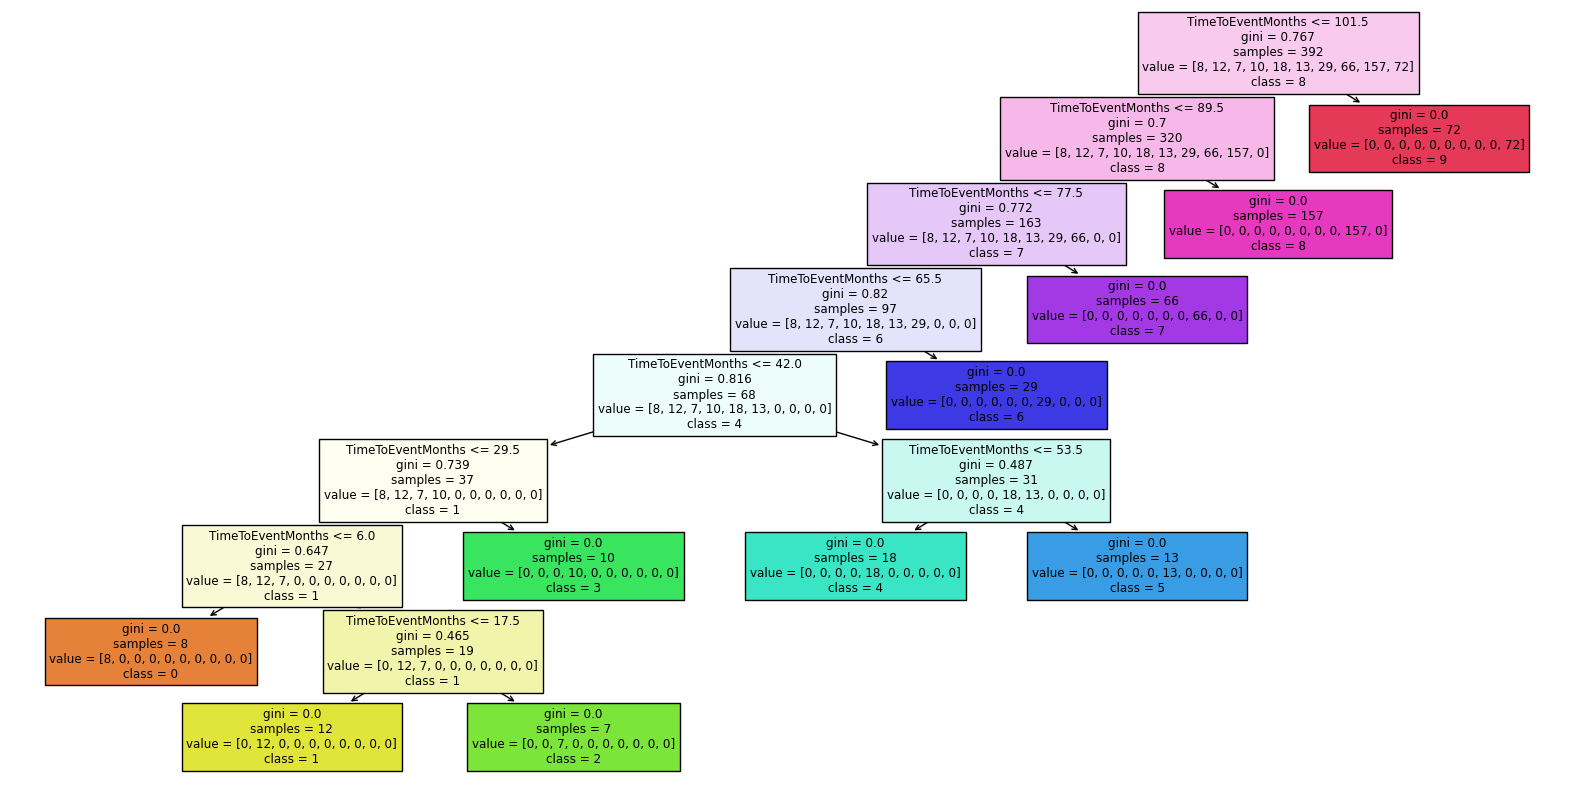

In [36]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()